In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

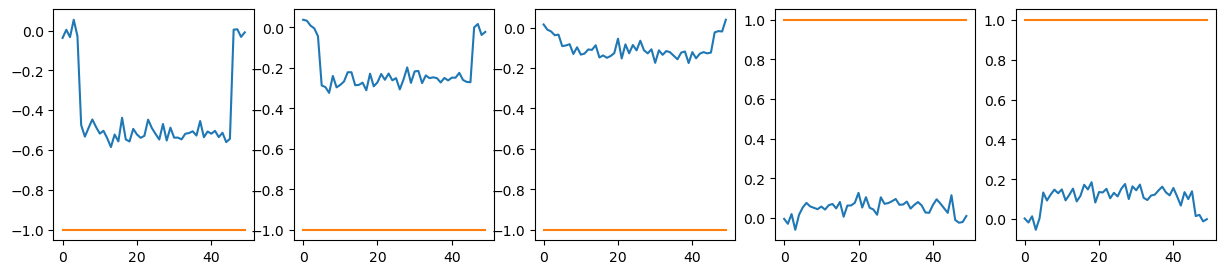

In [3]:
def data_generator(num_trials, T):
    alpha = 0.032
    arr = np.array([1, 2, 4, 8, 16])
    dist = np.concatenate((-alpha*arr, alpha*arr), axis=0)
    data = np.zeros((num_trials, T, 2))
    for i in range(num_trials):
        u_bar = np.random.choice(a=dist, size=1)[0]
        for t in range(T):
            noise = np.random.normal(loc=0, scale=0.03)
            if 5 <= t <= 45:
                data[i, t, 0] = u_bar + noise
            else:
                data[i, t, 0] = noise
        data[i, :, 1] = np.sign(u_bar)
    return data

num_trials = 5
T = 50
data = data_generator(num_trials, T)
fig, ax = plt.subplots(1, num_trials, figsize=(15,3))
for i in range(num_trials):
    ax[i].plot(range(T), data[i, :, 0])
    ax[i].plot(range(T), data[i, :, 1])
plt.show()

In [4]:
class LowRankRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LowRankRNN, self).__init__()
        self.hidden_dim = hidden_dim
        
        # Initialize trainable parameters
        self.W_in = torch.normal(0, 1, size=(input_dim, hidden_dim))
        self.W_out = torch.normal(0, 4, size=(input_dim, hidden_dim))
        
        # Left and right connectivity vectors
        self.m = nn.Parameter(torch.normal(0, 1, size=hidden_dim))
        self.n = nn.Parameter(torch.normal(0, 1, size=hidden_dim))
        
        # Biases
        self.b_h = nn.Parameter(torch.zeros(hidden_dim))
        self.b_out = nn.Parameter(torch.zeros(output_dim))
    
    def forward(self, x, hidden):
        # Recurrent connectivity matrix
        J = torch.outer(self.m, self.n)  # Construct low-rank J
        
        # Compute hidden state
        hidden = torch.tanh(x @ self.W_in + hidden @ J + self.b_h)
        
        # Compute output
        output = hidden @ self.W_out + self.b_out
        
        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_dim)

# Example usage
input_dim = 1
hidden_dim = 10
output_dim = 1
seq_length = 5

rnn = LowRankRNN(input_dim, hidden_dim, output_dim)
hidden = rnn.init_hidden()

# Dummy input sequence
inputs = torch.randn(seq_length, 1, input_dim)

# Forward pass through RNN
for i in range(seq_length):
    output, hidden = rnn(inputs[i], hidden)
    print(f'Step {i+1}, Output: {output.item()}')

Step 1, Output: -1.4533950090408325
Step 2, Output: -0.0685989037156105
Step 3, Output: -0.28861963748931885
Step 4, Output: 0.3085959553718567
Step 5, Output: -0.2448378950357437
